### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [25]:
raw_df = pd.read_csv("https://docs.google.com/spreadsheets/d/1-PG9bDtcSq9TI9rI9QbNrvZoO3AsG-gofaKGo42Th6A/gviz/tq?tqx=out:csv&sheet=Sheet1")

display(raw_df.head(10))
print(f"Розмір датафрейму: {raw_df.shape[0]} рядків, {raw_df.shape[1]} колонок\n")
print("Загальна інформація про дані:")
display(raw_df.info())
missing = raw_df.isna().sum().sort_values(ascending=False)
print(f"Пропущені значення:\n {missing[missing > 0]}")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


Розмір датафрейму: 2240 рядків, 29 колонок

Загальна інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds  

None

Пропущені значення:
 Income    24
dtype: int64


Колонка `Income` має пропущені дані які потрібно заповнити. Колонки Education, Marital_Status, Dt_Customer — це категоріальні ознаки або дати, які пізніше треба закодувати / конвертувати. Dt_Customer зчитався як object, і його потрібно перетворити в datetime.

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

Тут — оптимально заповнити медіаною, бо кластеризація базується на відстанях, і викиди/аномалії можуть змістити центри кластерів

In [36]:
df = raw_df.copy()
print("До заповнення:", df["Income"].isna().sum())

median_income = df["Income"].median()
df["Income"] = df["Income"].fillna(median_income)

print("Після заповнення:", df["Income"].isna().sum())
print("Використана медіана доходу:", median_income)

До заповнення: 24
Після заповнення: 0
Використана медіана доходу: 51381.5


**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [37]:
s = df['Dt_Customer'].astype(str).str.strip().str.replace(r'[./]', '-', regex=True)
parsed = None
formats = ['%d-%m-%Y', '%Y-%m-%d', '%d-%b-%Y', '%m-%d-%Y']

for fmt in formats:
    try:
        tmp = pd.to_datetime(s, format=fmt, errors='coerce')
        if tmp.notna().mean() >= 0.9:
            parsed = tmp
            print(f"Формат дати: {fmt} ({tmp.notna().sum()} із {len(tmp)})")
            break
    except Exception:
        pass

df['Dt_Customer'] = parsed

ref_date = df['Dt_Customer'].max()
df['Customer_For_Days'] = (ref_date - df['Dt_Customer']).dt.days

print("Missing values in Dt_Customer:", df['Dt_Customer'].isna().sum())
print( df[['Dt_Customer', 'Customer_For_Days']].head())


Формат дати: %d-%m-%Y (2240 із 2240)
Missing values in Dt_Customer: 0
  Dt_Customer  Customer_For_Days
0  2012-09-04                663
1  2014-03-08                113
2  2013-08-21                312
3  2014-02-10                139
4  2014-01-19                161


Дата Dt_Customer перетворена на числову ознаку Customer_For_Days, що відображає, скільки днів клієнт перебуває у програмі. Це дозволяє врахувати «вік» клієнта в базі.

In [38]:
education_order = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

df['Education'] = df['Education'].map(education_order)
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)
df.drop(columns=['Dt_Customer'], inplace=True)

print(df.shape)

(2240, 35)


In [42]:
display(df)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Customer_For_Days,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,2,58138.0,0,0,58,635,88,546,...,11,1,663,False,False,False,True,False,False,False
1,2174,1954,2,46344.0,1,1,38,11,1,6,...,11,0,113,False,False,False,True,False,False,False
2,4141,1965,2,71613.0,0,0,26,426,49,127,...,11,0,312,False,False,False,False,True,False,False
3,6182,1984,2,26646.0,1,0,26,11,4,20,...,11,0,139,False,False,False,False,True,False,False
4,5324,1981,4,58293.0,1,0,94,173,43,118,...,11,0,161,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223.0,0,1,46,709,43,182,...,11,0,381,False,False,True,False,False,False,False
2236,4001,1946,4,64014.0,2,1,56,406,0,30,...,11,0,19,False,False,False,False,True,False,False
2237,7270,1981,2,56981.0,0,0,91,908,48,217,...,11,0,155,False,True,False,False,False,False,False
2238,8235,1956,3,69245.0,0,1,8,428,30,214,...,11,0,156,False,False,False,False,True,False,False


In [40]:
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns after processing:", object_cols.tolist())

Object columns after processing: []


Після перетворення в нашому дата сеті не залишилось категоріальних колонок, отже дані готові длля побудови моделей

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [50]:
drop_cols = set(['ID', 'Response', 'Z_CostContact', 'Z_Revenue'])
drop_cols |= {c for c in df.columns if c.startswith('AcceptedCmp')}
feature_cols = [c for c in df.columns if c not in drop_cols]

X_raw = df[feature_cols].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
labels_k3 = kmeans.fit_predict(X)
df['cluster_k3'] = labels_k3

if len(np.unique(labels_k3)) > 1:
    sil = silhouette_score(X, labels_k3)
    print(f"Silhouette (k=3): {sil:.4f}")
else:
    print("Усі об'єкти впали в один кластер — силует не визначається.")


Silhouette (k=3): 0.2177


Silhouette (k=3) = 0.2177 тобто кластери існують, але межі розмиті. Для маркетингових даних це типово: профілі частково перекриваються. Отже в моделі присутня слабка сегментація: багато точок лежать «між» центрами кластерів.

Ймовірні причини:

- k=3 не оптимальне,

- у фічах надлишки/шум,

- «довгі хвости» по сумах покупок

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [59]:
spend_cols = ['MntWines','MntMeatProducts','MntFishProducts','MntFruits','MntSweetProducts','MntGoldProds']
buy_cols   = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

if 'TotalMnt' not in df: df['TotalMnt'] = df[spend_cols].sum(axis=1)
if 'TotalPurchases' not in df: df['TotalPurchases'] = df[buy_cols].sum(axis=1)
if 'AOV' not in df:
    den = df['TotalPurchases'].replace(0, np.nan)
    df['AOV'] = (df['TotalMnt'] / den).fillna(0)

In [62]:
fig = px.scatter_3d(
    df,
    x='Income', y='TotalPurchases', z='AOV',
    color='cluster_k3',
    size='TotalMnt',
    opacity=0.75, height=600,
    hover_data=['Recency','Customer_For_Days','WebShare','StoreShare']
)
fig.update_layout(title='Кластери: дохід × покупки × середній чек (розмір = TotalMnt)')
fig.show()

In [64]:
fig1 = px.scatter(
    df, x='Income', y='TotalMnt',
    color=df['cluster_k3'].astype(str),
    hover_data=['AOV','TotalPurchases','WebShare','StoreShare','Recency']
)
fig1.update_layout(title='Дохід vs Сума витрат (log1p)'); fig1.show()


Income vs TotalMnt:

Є чітка позитивна залежність: вищий дохід - більші загальні витрати.

Кластер 1 (синій) утворює щільну “хмару” у верхньому правому куті: вищий дохід і вищі витрати - це цінні “high-value” клієнти.

Кластер 0 (помаранчевий) компактний нижче та лівіше: середній/нижчий дохід і менші витрати - low/medium value з потенціалом росту.

Кластер 2 (бірюзовий) дуже малий і «між» групами (або розкиданий): схоже на артефакт k=3 або групку нетипових/викидних спостережень. Такі маленькі кластери — часта причина низького silhouette (~0.22).

In [65]:
fig2 = px.scatter(
    df, x='Recency', y='TotalPurchases',
    color=df['cluster_k3'].astype(str),
    hover_data=['AOV','Income','WebShare','StoreShare']
)
fig2.update_layout(title='Недавність покупок (Recency) vs К-сть покупок'); fig2.show()

Recency vs TotalPurchases:

Вісь Y (частота покупок) добре розрізняє:

Кластер 1 (синій) має більше покупок (15–30).

Кластер 0 (помаранчевий) — нижча частота (0–15).

Кластер 2 (бірюзовий) — кілька точок у середньо-вищій частоті.

Recency (давність) не дає явного розділення: точки всіх кластерів розкидані майже по всьому діапазону 0–100. Висновок — R (recency) слабше дискримінує, ніж F (frequency) і M (monetary/TotalMnt).

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [69]:
def build_X(df, drop_cols):
    X = df[[c for c in df.columns if c not in drop_cols]].copy()
    X = X.select_dtypes(include=[np.number])
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median(numeric_only=True))
    X = X.loc[:, X.var() > 0]
    return X

def kmeans_silhouette(X, k=3):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X)
    sil = np.nan
    if len(np.unique(labels)) > 1:
        sil = silhouette_score(X, labels)
    return sil, labels

X0 = build_X(df, drop_cols)

# 1) Без масштабування
sil_raw, lab_raw = kmeans_silhouette(X0, k=3)

# 2) Зі StandardScaler
X_std = StandardScaler().fit_transform(X0)
sil_std, lab_std = kmeans_silhouette(X_std, k=3)

# 3) (бонус) RobustScaler — стійкий до викидів
X_rob = RobustScaler().fit_transform(X0)
sil_rob, lab_rob = kmeans_silhouette(X_rob, k=3)

# 4) (бонус) MinMaxScaler — 0..1
X_mm = MinMaxScaler().fit_transform(X0)
sil_mm, lab_mm = kmeans_silhouette(X_mm, k=3)

# Порівняльна таблиця
res = pd.DataFrame({
    'scaling': ['None','Standard','Robust','MinMax'],
    'silhouette': [sil_raw, sil_std, sil_rob, sil_mm],
    'cluster_sizes': [
        pd.Series(lab_raw).value_counts().sort_index().to_dict(),
        pd.Series(lab_std).value_counts().sort_index().to_dict(),
        pd.Series(lab_rob).value_counts().sort_index().to_dict(),
        pd.Series(lab_mm).value_counts().sort_index().to_dict(),
    ]
})
res

,scaling,silhouette,cluster_sizes
0,None,0.376878,"{0: 1289, 1: 328, 2: 623}"
1,Standard,0.209265,"{0: 981, 1: 613, 2: 646}"
2,Robust,0.208233,"{0: 981, 1: 659, 2: 600}"
3,MinMax,0.215123,"{0: 548, 1: 565, 2: 1127}"


На цьому наборі для KMeans(k=3) масштабування знизило якість: Silhouette впав з 0.377 (без скейлу) до ≈0.21 (Standard/Robust/MinMax). Причина — сегментація переважно йде по «грошових/частотних» ознаках; вирівнювання ваг підняло вплив слабосигнальних бінарних фіч і розмило межі кластерів. Безмасштабний простір або вибіркове/зважене масштабування є доцільнішими.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [70]:
dfo = df.copy()

# ядро поведінки покупця
spend_cols = ['MntWines','MntMeatProducts','MntFishProducts','MntFruits','MntSweetProducts','MntGoldProds']
buy_cols   = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

if 'TotalMnt' not in dfo: dfo['TotalMnt'] = dfo[spend_cols].sum(axis=1)
if 'TotalPurchases' not in dfo: dfo['TotalPurchases'] = dfo[buy_cols].sum(axis=1)

den = dfo['TotalPurchases'].replace(0, np.nan)
if 'AOV' not in dfo: dfo['AOV'] = (dfo['TotalMnt'] / den).fillna(0)

rfm_like = [c for c in ['Income','TotalMnt','AOV','TotalPurchases','Recency'] if c in dfo.columns]
desc = dfo[rfm_like].describe(percentiles=[.01,.05,.95,.99]).T
desc[['min','1%','5%','50%','95%','99%','max']]

,min,1%,5%,50%,95%,99%,max
Income,2.134930,2.297499,2.384861,2.472079,2.512661,2.522179,2.667926
TotalMnt,1.026672,1.291725,1.419607,1.943613,2.137781,2.159000,2.178652
AOV,0.000000,0.224570,0.253249,0.409977,0.683844,0.741276,2.131387
TotalPurchases,0.000000,3.000000,3.000000,12.000000,24.000000,27.610000,32.000000
Recency,0.000000,0.000000,4.000000,49.000000,94.000000,98.000000,99.000000


In [71]:
def mad_based_zscore(x):
    med = np.median(x)
    mad = np.median(np.abs(x - med)) or 1e-9
    return 0.6745 * (x - med) / mad

df_hard = dfo.copy()
core = [c for c in ['Income','TotalMnt','AOV','TotalPurchases'] if c in df_hard.columns]
z = np.column_stack([mad_based_zscore(df_hard[c].values) for c in core])

thr = 6.0
mask_keep = (np.abs(z) <= thr).all(axis=1)
removed = (~mask_keep).sum()

df_hard = df_hard.loc[mask_keep].reset_index(drop=True)
print(f"Видалено як викиди: {removed} рядків із {len(dfo)}")


Видалено як викиди: 10 рядків із 2240


In [74]:
X0 = build_X(df_hard, drop_cols)

# 1) Без масштабування
sil_raw, lab_raw = kmeans_silhouette(X0, k=3)

# 2) Зі StandardScaler
X_std = StandardScaler().fit_transform(X0)
sil_std, lab_std = kmeans_silhouette(X_std, k=3)

# 3) (бонус) RobustScaler — стійкий до викидів
X_rob = RobustScaler().fit_transform(X0)
sil_rob, lab_rob = kmeans_silhouette(X_rob, k=3)

# 4) (бонус) MinMaxScaler — 0..1
X_mm = MinMaxScaler().fit_transform(X0)
sil_mm, lab_mm = kmeans_silhouette(X_mm, k=3)

# Порівняльна таблиця
res = pd.DataFrame({
    'scaling': ['None','Standard','Robust','MinMax'],
    'silhouette': [sil_raw, sil_std, sil_rob, sil_mm],
    'cluster_sizes': [
        pd.Series(lab_raw).value_counts().sort_index().to_dict(),
        pd.Series(lab_std).value_counts().sort_index().to_dict(),
        pd.Series(lab_rob).value_counts().sort_index().to_dict(),


        pd.Series(lab_mm).value_counts().sort_index().to_dict(),
    ]
})
res

,scaling,silhouette,cluster_sizes
0,None,0.375686,"{0: 621, 1: 1280, 2: 329}"
1,Standard,0.214378,"{0: 622, 1: 971, 2: 637}"
2,Robust,0.211221,"{0: 605, 1: 971, 2: 654}"
3,MinMax,0.217400,"{0: 545, 1: 1117, 2: 568}"


Жорстке видалення (MAD-z=6) майже не змінило якість.
Це очікувано: забрали лише 0.45% точок і, судячи з RFM-ядерних фіч, екстремів не було багато/вони вже приглушені попередньою підготовкою.

Найкращий силует знову без масштабування (≈0.376).
Розділення переважно визначається «великими» фічами (дохід/витрати/частота). При масштабуванні їхня вага зрівнюється з бінарними/слабосигнальними ознаками і межі розмиваються.

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

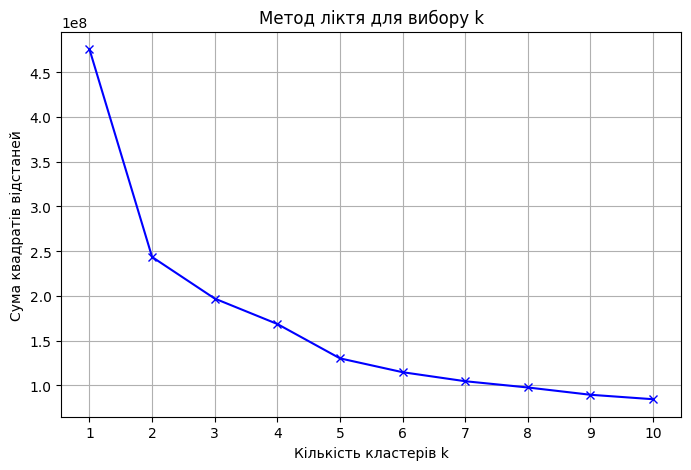

In [75]:
k_range = range(1, 11)
sum_of_squared_distance = []

for k in k_range:
  model = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X0)
  sum_of_squared_distance.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sum_of_squared_distance, 'bx-')
plt.xlabel('Кількість кластерів k')
plt.ylabel('Сума квадратів відстаней')
plt.title('Метод ліктя для вибору k')
plt.xticks(k_range)
plt.grid()
plt.show()


На графіку к=3 не є оптимальним значенням, а оптимальним значенням можна було б обрати к=5

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [ ]:
def build_X(frame):
    X = frame[[c for c in frame.columns if c not in drop_cols]].select_dtypes(include=[np.number]).copy()
    X = X.replace([np.inf,-np.inf], np.nan).fillna(X.median(numeric_only=True))
    X = X.loc[:, X.var() > 0]
    return X

X_h = build_X(df_hard)
print(X_h.shape)
display(X_h.head())

(2230, 26)


,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,Complain,Customer_For_Days,cluster_k3,TotalMnt,TotalPurchases,AOV,WebShare,CatalogShare,StoreShare
0,1957,2,2.482453,0,0,58,635,88,546,172,...,7,0,663,1,2.126915,22,0.289576,0.363636,0.454545,0.181818
1,1954,2,2.463331,1,1,38,11,1,6,2,...,5,0,113,0,1.466077,4,0.605982,0.250000,0.250000,0.500000
2,1965,2,2.499717,0,0,26,426,49,127,111,...,4,0,312,1,2.035417,20,0.287261,0.400000,0.100000,0.500000
3,1984,2,2.415059,1,0,26,11,4,20,10,...,6,0,139,0,1.607232,6,0.509723,0.333333,0.000000,0.666667
4,1981,4,2.482675,1,0,94,173,43,118,46,...,5,0,161,0,1.952655,14,0.359041,0.357143,0.214286,0.428571


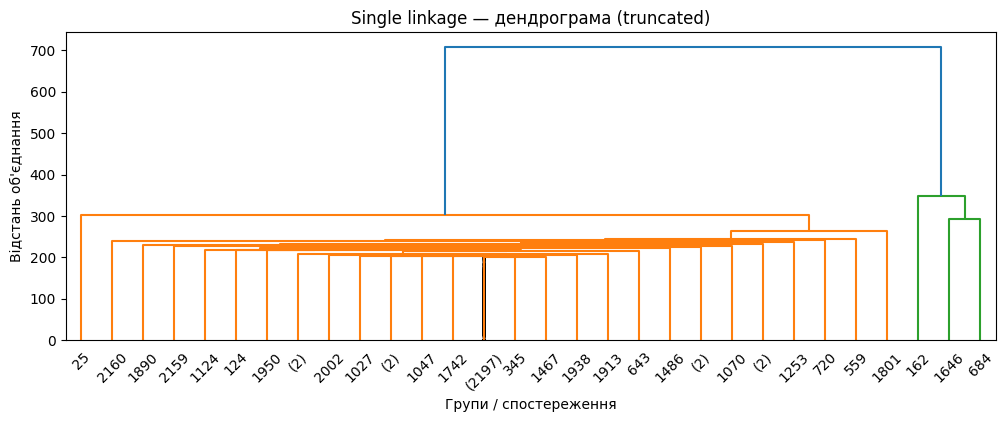

In [ ]:
Z = linkage(X_h, method='single', metric='euclidean', optimal_ordering=True)

plt.figure(figsize=(12, 4))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    show_leaf_counts=True,
    leaf_rotation=45,
    leaf_font_size=10,
    show_contracted=True,
)
plt.title("Single linkage — дендрограма (truncated)")
plt.xlabel("Групи / спостереження")
plt.ylabel("Відстань об'єднання")
plt.show()

In [87]:
# 2 кластери
lab2 = fcluster(Z, t=2, criterion='maxclust')
sil2 = silhouette_score(X_h, lab2) if len(np.unique(lab2)) > 1 else np.nan
print("k=2  sizes:", pd.Series(lab2).value_counts().sort_index().to_dict(), "  silhouette:", round(sil2, 4))

# 3 кластери
lab3 = fcluster(Z, t=3, criterion='maxclust')
sil3 = silhouette_score(X_h, lab3) if len(np.unique(lab3)) > 1 else np.nan
print("k=3  sizes:", pd.Series(lab3).value_counts().sort_index().to_dict(), "  silhouette:", round(sil3, 4))


k=2  sizes: {1: 2227, 2: 3}   silhouette: 0.6336
k=3  sizes: {1: 2227, 2: 2, 3: 1}   silhouette: 0.6187


In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

Xp = StandardScaler().fit_transform(X_h)  # тільки для PCA
Xp = PCA(n_components=2, random_state=42).fit_transform(Xp)

px.scatter(x=Xp[:,0], y=Xp[:,1], color=lab2.astype(str),
           labels={'x':'PC1','y':'PC2'}, title=f'Hierarchical (single), k=2 — PCA 2D (sil={sil2:.3f})').show()

px.scatter(x=Xp[:,0], y=Xp[:,1], color=lab3.astype(str),
           labels={'x':'PC1','y':'PC2'}, title=f'Hierarchical (single), k=3 — PCA 2D (sil={sil3:.3f})').show()


Кластеризації single linkage для k=2 і k=3 невдалі: вони виділяють лише 1–3 «особливі» точки в окремі кластери.

Метрика силуету вводить в оману через дегеративний розмір кластерів;

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [94]:
dfd = df_hard.copy()

# агрегати, якщо їх ще нема
if 'TotalMnt' not in dfd: dfd['TotalMnt'] = dfd[spend_cols].sum(axis=1)
if 'TotalPurchases' not in dfd: dfd['TotalPurchases'] = dfd[buy_cols].sum(axis=1)
den = dfd['TotalPurchases'].replace(0, np.nan)
if 'AOV' not in dfd: dfd['AOV'] = (dfd['TotalMnt'] / den).fillna(0)
for c in ['Income','TotalMnt','AOV']:  # пом'якшимо хвости
    dfd[c] = np.log1p(dfd[c])

feat = [c for c in ['Income','TotalMnt','AOV','TotalPurchases','Recency',
                    'WebShare','CatalogShare','StoreShare','NumWebVisitsMonth',
                    'Customer_For_Days'] if c in dfd.columns]

X_db = dfd[feat].replace([np.inf,-np.inf], np.nan).fillna(0).values
X_db = RobustScaler().fit_transform(X_db)

X_db.shape, feat

((2230, 10),
 ['Income',
  'TotalMnt',
  'AOV',
  'TotalPurchases',
  'Recency',
  'WebShare',
  'CatalogShare',
  'StoreShare',
  'NumWebVisitsMonth',
  'Customer_For_Days'])

In [110]:
dbscan = DBSCAN(eps=0.9, min_samples=10, metric='euclidean', n_jobs=-1)
labels_db = dbscan.fit_predict(X_db)
dfd['cluster_db'] = labels_db
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)

print(f"DBSCAN: знайдено {n_clusters} кластерів (викидів: {(labels_db == -1).sum()})")
if n_clusters > 0:
    sil_db = silhouette_score(X_db, labels_db) if len(np.unique(labels_db)) > 1 else np.nan
    print(f"Silhouette: {sil_db:.4f}")
if n_clusters > 0:
    px.scatter(
        dfd, x='Income', y='TotalPurchases',
        color=dfd['cluster_db'].astype(str),
        hover_data=['AOV','TotalMnt','WebShare','StoreShare','Recency']
    ).update_layout(title='DBSCAN: Дохід vs К-сть покупок').show()


DBSCAN: знайдено 3 кластерів (викидів: 206)
Silhouette: 0.1148


З поточними параметрами DBSCAN дав 3 кластери + ~9% noise і низький силует (0.115). Це свідчить, що для датасету метод не формує корисні сегменти, зате придатний для позначення нетипових клієнтів. Для бізнес-сегментації доцільніше лишатися на KMeans або спершу зменшити вимірність і ретельніше підібрати eps/min_samples для DBSCAN.